### Курсовая работа по курсу "Теория вероятностей и математическая статистика"
Датасет из kaggle: [Graduate Admissions dataset](https://www.kaggle.com/mohansacharya/graduate-admissions) 
#### * Цели:
    1. Описательная статистика
    2. Проверить гипотезу о линейной зависимости оценок TOEFL Score и шанса на поступление в уиверситет.
    3. Построить модель лийной регресси по всем признакам и предсказать целевой признак.

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.stats import norm

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.stats

%matplotlib inline
pd.options.display.max_columns = 500

In [9]:
df = pd.read_csv("Admission_Predict.csv")


In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# DATA PREPARATION

Оставим только важные признаки:

In [11]:

df = df[['GRE Score', 'TOEFL Score','SOP',
       'LOR ', 'CGPA','Chance of Admit ']]
df.columns = [['GRE', 'TOEFL','SOP',
       'LOR', 'CGPA', 'Chance']]

In [12]:
df.head()

,GRE,TOEFL,SOP,LOR,CGPA,Chance
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65


# 1. Статистический анализ

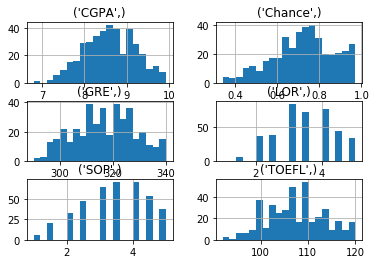

In [13]:
df.hist(bins = 20);

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Chance,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [15]:
df.corr()

,GRE,TOEFL,SOP,LOR,CGPA,Chance
GRE,1.000000,0.835977,0.612831,0.557555,0.833060,0.802610
TOEFL,0.835977,1.000000,0.657981,0.567721,0.828417,0.791594
SOP,0.612831,0.657981,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.718144,0.670211,1.000000,0.873289
Chance,0.802610,0.791594,0.675732,0.669889,0.873289,1.000000


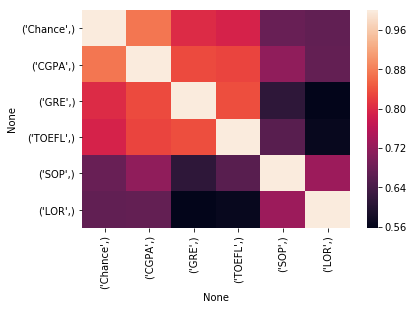

In [16]:
df_sorted = df[["Chance", "CGPA", "GRE", "TOEFL", "SOP", "LOR"]]
corr = df_sorted.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

# 2. Проверить гипотезу о линейной зависимости оценок TOEFL Score и шанса на поступление в уиверситет.

Парная модель регрессии

In [17]:
x = df["TOEFL"].values
y = df["Chance"].values

расчет коэфицентов В0,В1

x = TOEFL, y = Chance

$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$

In [18]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) /\
                       (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
b0,b1

(-1.2734004705157596, 0.01859929681143059)

$ y = -1.2734 + 0.0185 \cdot x$

коэффициент детерминации, среднюю ошибку аппроксимации.

In [19]:
predict = b0+b1*x
predict[:10]

array([[0.92131655],
       [0.71672429],
       [0.6609264 ],
       [0.77252218],
       [0.6423271 ],
       [0.86551866],
       [0.75392288],
       [0.60512851],
       [0.6237278 ],
       [0.73532359]])

In [20]:
y[:10]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

In [21]:
R = predict.var() / y.var()
print(f"коэффициент детерминации = {R}")

коэффициент детерминации = 0.6266210401517393


In [22]:
Er = np.abs((y - predict) / y).mean()
print(f"средняя ошибка апроксимации = {Er}")

средняя ошибка апроксимации = 0.10505848563873728


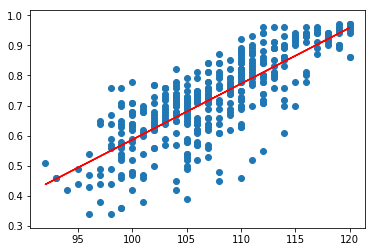

In [23]:
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x, color='red');

### F-критерий Фишера

In [24]:
n = y.shape[0]
k1 = 1
k2 = n-k1-1

T1 = (R / (1 - R)) * (k2 / k1)
T1

667.9411557677088

In [25]:
from scipy import stats
alpha = 0.05 # уровень значимости
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.8649292212017365

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

### Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.

$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$

In [26]:
upper = ((y - predict) ** 2).sum() / (n - 2)
lower = ((x - x.mean()) ** 2).sum()
se_slope = np.sqrt(upper / lower)
print(f"стандартная ошибка коэффициента наклона = {se_slope}")

стандартная ошибка коэффициента наклона = 0.000719660097261644


In [27]:
t = scipy.stats.t.ppf(1-(alpha/2), k2)
t

1.9659423239761926

критическая область для наклона 

$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right) = \left( -\infty, - 1.9659 \right) \cup \left( 1.9659, \infty \right)$


In [28]:
T_b1 = b1 / se_slope
T_b1

25.844557565720528

Значение T попало в критическую область, значит, значение параметра 𝑏1 является значимым.

Доверительный интервал для параметра b1

In [29]:
(b1 - t * se_slope, b1 + t * se_slope)

(0.017184486567347102, 0.02001410705551408)

### Проверим значимость коэффициента сдвига, а также построим для него доверительный интервал.

$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$

In [30]:
se_inter = se_slope*np.sqrt((x ** 2).mean())
print(f"стандартная ошибка коэффициента сдвига = {se_inter}")

стандартная ошибка коэффициента сдвига = 0.07742169753131144


In [31]:
T_b0 = b0 / se_inter
T_b0

-16.447591710331096

Значение T попало в критическую область, значит, значение параметра 𝑏0 является значимым.

Доверительный интервал для параметра b0

In [32]:
(b0 - t * se_inter, b0 + t * se_inter)

(-1.4256070624866477, -1.1211938785448714)

## Вывод: 
    1. Зависимость между TOEFL и Chance линейна с вероятность 95%.
    2. Chance можно вычислить по формуле у = b0 + b1*x  +- Er

# 3. Построить модель лийной регресси по всем признакам и предсказать целевой признак.

In [33]:
# Mетод наименьших квадратов

In [34]:
df.head()

,GRE,TOEFL,SOP,LOR,CGPA,Chance
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65


In [35]:

matrix_ = np.hstack((np.ones((x.shape[0], 1)), df[['CGPA', 'GRE', 'LOR', 'SOP', 'TOEFL']].values))
matrix_

array([[  1.  ,   9.65, 337.  ,   4.5 ,   4.5 , 118.  ],
       [  1.  ,   8.87, 324.  ,   4.5 ,   4.  , 107.  ],
       [  1.  ,   8.  , 316.  ,   3.5 ,   3.  , 104.  ],
       ...,
       [  1.  ,   9.45, 330.  ,   4.5 ,   5.  , 116.  ],
       [  1.  ,   8.78, 312.  ,   4.  ,   3.5 , 103.  ],
       [  1.  ,   9.66, 333.  ,   4.  ,   5.  , 117.  ]])

In [36]:
XTX = matrix_.T.dot(matrix_)
np.linalg.det(XTX) # Determinant >0 

8.478478851188291e+16

In [37]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(matrix_.T).dot(y)
b

array([[-1.46208602e+00],
       [ 1.22723756e-01],
       [ 2.31874653e-03],
       [ 2.38696018e-02],
       [ 2.03505817e-04],
       [ 2.91821652e-03]])

In [38]:
predict_LR = matrix_.dot(b)
predict_LR[:10]

array([[0.95629434],
       [0.79822397],
       [0.64007657],
       [0.72995542],
       [0.64615454],
       [0.8574597 ],
       [0.70274094],
       [0.61243438],
       [0.55383498],
       [0.72978187]])

коэффициент детерминации, среднюю ошибку аппроксимации.

In [39]:
R = predict_LR.var() / y.var()
print(f"коэффициент детерминации = {R}")

коэффициент детерминации = 0.797901835032261


In [40]:
Er = np.abs((y - predict_LR) / y).mean()
print(f"средняя ошибка апроксимации = {Er}")

средняя ошибка апроксимации = 0.07367088857528058


попробуем оределить лучшую комбинацию признаков:

In [41]:
feats= ['CGPA', 'GRE', 'LOR', 'SOP', 'TOEFL']
from itertools import permutations as permutations

In [42]:
for i in range (1,6):
    maxR = 0
    MaxFeats = []
    best_coef = []
    search = permutations(feats,i) 
    for j in search:
        temp = np.hstack((np.ones((x.shape[0], 1)), df[list(j)].values))
        XTX_ = temp.T.dot(temp)
        XTX_inv_ = np.linalg.inv(XTX_)
        b_ = XTX_inv_.dot(temp.T).dot(y)
        predict_ = temp.dot(b_)
        R_ = predict_.var() / y.var()
        if R_> maxR:
            maxR = R_
            best_coef = b_
            MaxFeats = j
    print(f"For {i} feature{'s'*(i>1)}  best:{maxR}")
    print(MaxFeats)
    print()

For 1 feature  best:0.7626338510526709
('CGPA',)

For 2 features  best:0.7810684887221111
('CGPA', 'GRE')

For 3 features  best:0.7941207024353992
('GRE', 'LOR', 'CGPA')

For 4 features  best:0.7979010892520993
('LOR', 'GRE', 'CGPA', 'TOEFL')

For 5 features  best:0.7979018350325461
('GRE', 'SOP', 'CGPA', 'LOR', 'TOEFL')

